# Data Pre Processing by Samuel Dominguez

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Raw Dataset

In [2]:
raw_df = pd.read_csv('../data/raw/plays.csv')
raw_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [3]:
raw_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            16124 non-null  int64  
 1   playId                            16124 non-null  int64  
 2   playDescription                   16124 non-null  object 
 3   quarter                           16124 non-null  int64  
 4   down                              16124 non-null  int64  
 5   yardsToGo                         16124 non-null  int64  
 6   possessionTeam                    16124 non-null  object 
 7   defensiveTeam                     16124 non-null  object 
 8   yardlineSide                      15900 non-null  object 
 9   yardlineNumber                    16124 non-null  int64  
 10  gameClock                         16124 non-null  object 
 11  preSnapHomeScore                  16124 non-null  int64  
 12  preS

In [5]:
raw_df_shape = raw_df.shape
print(f'The raw dataset has and {raw_df_shape[0]} rows and {raw_df_shape[1]} columns.')

The raw dataset has and 16124 rows and 50 columns.


### Filter Out QB Spike and QB Kneel

In [6]:
df = raw_df.copy()

df = df[(df.qbSpike != 1)]

df = df[(df.qbKneel != 1)]

### Select Input / Output Columns

In [7]:
# play description and isDropback will be removed later, but they are kept to gather more context when investigating plays will null values
df = df[['playDescription', 'isDropback', 'down', 'yardsToGo', 'absoluteYardlineNumber', 'gameClock', 'quarter', 'offenseFormation', 'receiverAlignment', 'playAction', 'dropbackType', 'qbSneak', 'rushLocationType', 'pff_runConceptPrimary', 'pff_runPassOption', 'pff_passCoverage', 'pff_manZone', 'yardsGained']]
df.head()

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,gameClock,quarter,offenseFormation,receiverAlignment,playAction,dropbackType,qbSneak,rushLocationType,pff_runConceptPrimary,pff_runPassOption,pff_passCoverage,pff_manZone,yardsGained
0,(1:54) (Shotgun) J.Burrow pass short middle to...,True,1,10,31,01:54,3,EMPTY,3x2,False,TRADITIONAL,NaN,NaN,NaN,0,Cover-3,Zone,9
1,(2:13) (Shotgun) J.Burrow pass short right to ...,True,1,10,18,02:13,4,EMPTY,3x2,False,TRADITIONAL,NaN,NaN,NaN,0,Quarters,Zone,4
2,(2:00) (Shotgun) D.Mills pass short right to D...,True,3,12,30,02:00,4,SHOTGUN,2x2,False,TRADITIONAL,NaN,NaN,NaN,0,Quarters,Zone,6
3,(9:28) (Shotgun) P.Mahomes pass short left to ...,True,2,10,33,09:28,1,SHOTGUN,2x2,False,TRADITIONAL,NaN,NaN,NaN,0,Quarters,Zone,4
4,(2:16) (Shotgun) L.Jackson up the middle to TB...,False,2,8,37,02:16,3,PISTOL,3x1,True,DESIGNED_RUN,False,INSIDE_LEFT,MAN,0,Cover-1,Man,-1


### Investigate Missing Values

In [8]:
na_values = df.isna().any()

na_values[na_values == True].index

Index(['dropbackType', 'qbSneak', 'rushLocationType', 'pff_runConceptPrimary',
       'pff_passCoverage', 'pff_manZone'],
      dtype='object')

#### QB Sneak

In [9]:
print(f'Unique QB Sneak before: {df.qbSneak.unique()}')
df.qbSneak = df.qbSneak.fillna(0, axis=0)
df.qbSneak = df.qbSneak.astype(int)
print(f'Unique QB Sneak after: {df.qbSneak.unique()}')

Unique QB Sneak before: [nan False True]
Unique QB Sneak after: [0 1]


#### Rush Location Type

In [10]:
print(f'Unique Rush Location Type before: {df.rushLocationType.unique()}')
df[df.rushLocationType.isna()].playDescription

Unique Rush Location Type before: [nan 'INSIDE_LEFT' 'INSIDE_RIGHT' 'OUTSIDE_LEFT' 'OUTSIDE_RIGHT']


0        (1:54) (Shotgun) J.Burrow pass short middle to...
1        (2:13) (Shotgun) J.Burrow pass short right to ...
2        (2:00) (Shotgun) D.Mills pass short right to D...
3        (9:28) (Shotgun) P.Mahomes pass short left to ...
8        (12:51) (Shotgun) J.Hurts pass incomplete shor...
                               ...                        
16116    (12:39) C.Wentz pass short middle to L.Thomas ...
16117    (15:00) K.Pickett pass deep right to D.Johnson...
16119    (12:49) (Shotgun) T.Lawrence pass incomplete s...
16120    (12:32) (Shotgun) K.Cousins pass incomplete de...
16122    (:45) C.Rush pass incomplete deep right to C.L...
Name: playDescription, Length: 9313, dtype: object

In [11]:
df[(df.rushLocationType.isna()) & ~(df.playDescription.str.contains('pass'))].playDescription

90       (5:04) (Shotgun) M.Trubisky sacked at PIT 10 f...
101      (10:55) (Shotgun) M.Mariota sacked at SEA 36 f...
133      (:38) (Shotgun) D.Carr sacked at LV 12 for -7 ...
135      (12:49) (Shotgun) A.Rodgers sacked at GB 43 fo...
232      (13:33) B.Mayfield sacked at CAR 42 for -3 yar...
                               ...                        
16061    (:41) (Shotgun) Z.Wilson sacked at NYJ 14 for ...
16074    (14:21) (Shotgun) D.Carr sacked at LV 24 for -...
16082    (14:47) J.Fields sacked at CHI 15 for -5 yards...
16099    (5:06) (Shotgun) J.Herbert sacked at LAC 22 fo...
16107    (2:05) (Shotgun) T.Heinicke sacked at WAS 7 fo...
Name: playDescription, Length: 608, dtype: object

In [12]:
df[(df.rushLocationType.isna()) & ~(df.playDescription.str.contains('pass|sacked'))].playDescription

Series([], Name: playDescription, dtype: object)

Since all of the plays that had a rush location of NA were passes or sacks, those plays are still important to keep in the dataset. I will fill NA with 'NONE'.

In [13]:
df.rushLocationType = df.rushLocationType.fillna('NONE', axis=0)
print(f'Unique Rush Location Type after: {df.rushLocationType.unique()}')

Unique Rush Location Type after: ['NONE' 'INSIDE_LEFT' 'INSIDE_RIGHT' 'OUTSIDE_LEFT' 'OUTSIDE_RIGHT']


#### PFF Primary Run Concept

In [14]:
print(f'Unique Primary Run Concept before: {df.pff_runConceptPrimary.unique()}')
df[df.pff_runConceptPrimary.isna()].playDescription

Unique Primary Run Concept before: [nan 'MAN' 'INSIDE ZONE' 'PULL LEAD' 'OUTSIDE ZONE' 'TRAP' 'SNEAK' 'POWER'
 'COUNTER' 'UNDEFINED' 'DRAW' 'TRICK' 'FB RUN']


0        (1:54) (Shotgun) J.Burrow pass short middle to...
1        (2:13) (Shotgun) J.Burrow pass short right to ...
2        (2:00) (Shotgun) D.Mills pass short right to D...
3        (9:28) (Shotgun) P.Mahomes pass short left to ...
8        (12:51) (Shotgun) J.Hurts pass incomplete shor...
                               ...                        
16113    (8:12) (Shotgun) J.Herbert pass short right to...
16114    (:28) (Shotgun) T.Bridgewater pass short right...
16119    (12:49) (Shotgun) T.Lawrence pass incomplete s...
16120    (12:32) (Shotgun) K.Cousins pass incomplete de...
16121    (9:59) (Shotgun) P.Mahomes scrambles right end...
Name: playDescription, Length: 7030, dtype: object

In [15]:
df[df.pff_runConceptPrimary.isna() & ~(df.playDescription.str.contains('pass|sacked|scrambles'))].playDescription

182      (10:04) (Shotgun) J.Hurts up the middle to JAX...
264      (2:50) C.Godwin right end to LA 6 for 1 yard (...
374      (14:13) (Shotgun) J.Fields FUMBLES (Aborted) a...
3631     (5:04) (Shotgun) T.Etienne left end to IND 22 ...
4148     (:25) (No Huddle, Shotgun) B.Bolden left end t...
7181     (8:43) D.Henry right end pushed ob at IND 7 fo...
9581     (2:13) T.Kelce up the middle to IND 1 for 1 ya...
11841    (8:07) D.Samuel right end to SF 31 for 2 yards...
12628    (1:55) C.Godwin right end to ATL 8 for 2 yards...
13158    (5:16) (Shotgun) J.Mixon left end to CIN 37 fo...
14001    (13:13) G.Everett left end to LAC 17 for no ga...
14244    (12:06) (Shotgun) J.Hasty left end to JAX 14 f...
15021    (7:24) (Shotgun) L.Shenault right end to CAR 2...
15962    (12:53) (Shotgun) C.Akers left end to LA 32 fo...
Name: playDescription, dtype: object

For plays that did not have a primary run concept and were not designed passes (a play description including 'pass', 'sacked' or 'scrambles'), then the run play likely did not fit one of the other run concepts. So I will label these plays with 'OTHER' and label the designed passes with 'NONE'.

In [16]:
other_run_concept_condition = df.pff_runConceptPrimary.isna() & ~(df.playDescription.str.contains('pass|sacked|scrambles'))

df.loc[other_run_concept_condition, 'pff_runConceptPrimary'] = df.loc[other_run_concept_condition, 'pff_runConceptPrimary'].fillna('OTHER')

In [17]:
df.loc[df.pff_runConceptPrimary.isna(), 'pff_runConceptPrimary'] = df.loc[df.pff_runConceptPrimary.isna(), 'pff_runConceptPrimary'].fillna('NONE')
print(f'Unique Primary Run Concept after: {df.pff_runConceptPrimary.unique()}')

Unique Primary Run Concept after: ['NONE' 'MAN' 'INSIDE ZONE' 'PULL LEAD' 'OUTSIDE ZONE' 'TRAP' 'SNEAK'
 'POWER' 'COUNTER' 'UNDEFINED' 'DRAW' 'OTHER' 'TRICK' 'FB RUN']


I want to investigate the difference between 'OTHER', 'NONE', and 'UNDEFINED' run concepts to see if one of these can be combined into the other.

In [18]:
count_none = df.loc[df.pff_runConceptPrimary == 'NONE', 'playDescription'].count()
print(f'Plays with "NONE" Run Concept": {count_none}')

count_none_not_pass = df.loc[(df.pff_runConceptPrimary == 'NONE') & (~df.playDescription.str.contains('pass|sack|scramble')), 'playDescription'].count()
print(f'Plays with "NONE" Run Concept that are not designed passes: {count_none_not_pass}')

Plays with "NONE" Run Concept": 7016
Plays with "NONE" Run Concept that are not designed passes: 0


In [19]:
count_undefined = df.loc[df.pff_runConceptPrimary == 'UNDEFINED', 'playDescription'].count()
print(f'Plays with "UNDEFINED" Run Concept": {count_undefined}')

count_undefined_not_pass = df.loc[(df.pff_runConceptPrimary == 'UNDEFINED') & (~df.playDescription.str.contains('pass|sack|scramble')), 'playDescription'].count()
print(f'Plays with "UNDEFINED" Run Concept that are not designed passes: {count_undefined_not_pass}')

Plays with "UNDEFINED" Run Concept": 730
Plays with "UNDEFINED" Run Concept that are not designed passes: 29


In [20]:
df.loc[(df.pff_runConceptPrimary == 'UNDEFINED') & (df.playDescription.str.contains('pass|sack|scramble')), 'pff_runConceptPrimary'].count()

np.int64(701)

Since all plays with a run concept of "NONE" are designed passes (have 'pass', 'sack', or 'scramble' in the description), I will make that the assigned run concept for passing plays.

In [21]:
# Relabel plays that are passes to from 'UNDEFINED' to 'NONE'
df.loc[(df.pff_runConceptPrimary == 'UNDEFINED') & (df.playDescription.str.contains('pass|sack|scramble')), 'pff_runConceptPrimary'] = "NONE"

In [22]:
df.loc[df.pff_runConceptPrimary == 'UNDEFINED', 'playDescription']

466      (2:32) (Shotgun) T.Tagovailoa FUMBLES (Aborted...
837      (1:14) (Shotgun) C.Wentz FUMBLES (Aborted) at ...
860      (8:00) M.Cannon reported in as eligible.  B.Za...
927      (14:52) (Shotgun) J.Fields FUMBLES (Aborted) a...
1238     (4:40) D.Carr FUMBLES (Aborted) at LV 29, touc...
1270     (1:00) K.Cousins up the middle to WAS 10 for -...
1766     (11:24) (Shotgun) L.Jackson Aborted. T.Linderb...
1982     (:08) M.Jones right guard to NYJ 24 for -1 yards.
3192     (8:01) B.Perriman FUMBLES (Aborted) at TB 41, ...
3775     (:18) R.Tannehill right tackle to NYG 29 for -...
4222     (12:44) J.Garoppolo FUMBLES (Aborted) at 50, R...
5036     (2:48) (Shotgun) M.Stafford FUMBLES (Aborted) ...
6219     (3:51) (Shotgun) M.Trubisky Aborted. M.Cole FU...
6679     (1:56) (Shotgun) J.Hurts FUMBLES (Aborted) at ...
6683     (5:58) (Shotgun) M.Ryan up the middle to IND 4...
6709     (5:47) S.Barkley up the middle to CAR 29 for 1...
7761     (10:31) (Shotgun) C.Samuel right guard to PHI .

In [23]:
df.loc[(df.pff_runConceptPrimary == 'UNDEFINED') & (~df.playDescription.str.contains('FUMBLES')), :]

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,gameClock,quarter,offenseFormation,receiverAlignment,playAction,dropbackType,qbSneak,rushLocationType,pff_runConceptPrimary,pff_runPassOption,pff_passCoverage,pff_manZone,yardsGained
1270,(1:00) K.Cousins up the middle to WAS 10 for -...,False,3,6,104,01:00,4,SINGLEBACK,3x1,False,SCRAMBLE_ROLLOUT_LEFT,0,OUTSIDE_LEFT,UNDEFINED,0,Red Zone,Other,-4
1982,(:08) M.Jones right guard to NYJ 24 for -1 yards.,False,3,21,33,00:08,2,JUMBO,2x2,False,SCRAMBLE_ROLLOUT_RIGHT,0,INSIDE_RIGHT,UNDEFINED,0,Cover-2,Zone,-1
3775,(:18) R.Tannehill right tackle to NYG 29 for -...,False,1,10,37,00:18,4,JUMBO,2x2,False,DESIGNED_RUN,0,OUTSIDE_RIGHT,UNDEFINED,0,Cover-1,Man,-2
6683,(5:58) (Shotgun) M.Ryan up the middle to IND 4...,False,1,10,59,05:58,2,SHOTGUN,3x1,False,DESIGNED_RUN,0,INSIDE_LEFT,UNDEFINED,0,Cover-2,Zone,-6
6709,(5:47) S.Barkley up the middle to CAR 29 for 1...,False,1,10,80,05:47,4,SINGLEBACK,3x1,False,NaN,0,INSIDE_RIGHT,UNDEFINED,0,Cover-3,Zone,1
7761,(10:31) (Shotgun) C.Samuel right guard to PHI ...,False,1,10,24,10:31,4,SHOTGUN,2x2,False,NaN,0,INSIDE_RIGHT,UNDEFINED,0,Quarters,Zone,-2
12774,(:36) (No Huddle) J.Warren right tackle to CLV...,False,2,4,98,00:36,1,SINGLEBACK,3x1,False,NaN,0,OUTSIDE_RIGHT,UNDEFINED,0,Cover-3,Zone,7
12915,(7:37) (No Huddle) N.Chubb right guard to CIN ...,False,1,10,78,07:37,2,SINGLEBACK,3x1,False,NaN,0,INSIDE_RIGHT,UNDEFINED,0,Cover-1,Man,0
14695,(5:52) (Shotgun) C.Edwards-Helaire left end to...,False,1,10,61,05:52,2,SHOTGUN,2x2,False,NaN,0,OUTSIDE_LEFT,UNDEFINED,0,Cover-3 Seam,Zone,1


Plays with an undefined run concept are either fumbles or not. The non-fumble plays I will label as 'OTHER' since the play description indicates plays that might be useful for the model. The plays that had fumbles can be removed.

In [24]:
df.loc[(df.pff_runConceptPrimary == 'UNDEFINED') & (~df.playDescription.str.contains('FUMBLES')), 'pff_runConceptPrimary'] = 'OTHER'

In [25]:
df = df.loc[df.pff_runConceptPrimary != 'UNDEFINED', :]

In [26]:
print(f'Unique Primary Run Concept after: {df.pff_runConceptPrimary.unique()}')

Unique Primary Run Concept after: ['NONE' 'MAN' 'INSIDE ZONE' 'PULL LEAD' 'OUTSIDE ZONE' 'TRAP' 'SNEAK'
 'POWER' 'COUNTER' 'DRAW' 'OTHER' 'TRICK' 'FB RUN']


#### PFF Pass Coverage

In [27]:
print(f'Unique Pass Coverage before: {df.pff_passCoverage.unique()}')

Unique Pass Coverage before: ['Cover-3' 'Quarters' 'Cover-1' 'Cover 6-Left' 'Cover-2' 'Cover-0'
 'Cover-3 Seam' 'Cover-6 Right' 'Goal Line' 'Red Zone' '2-Man'
 'Cover-3 Double Cloud' 'Bracket' 'Miscellaneous' 'Cover-3 Cloud Left'
 'Prevent' nan 'Cover-1 Double' 'Cover-3 Cloud Right']


In [28]:
df.loc[df.pff_passCoverage.isna(), ['playDescription', 'pff_manZone']]

,playDescription,pff_manZone
196,(:16) D.Pierce right guard to HST 34 for 2 yar...,NaN
3436,(12:32) T.Lawrence right guard to NYG 1 for 1 ...,NaN
5339,(:06) R.Tannehill up the middle to TEN 3 for 2...,NaN
9579,"(11:47) T.Lawrence up the middle for 1 yard, T...",NaN
11216,(11:30) T.Lawrence up the middle to NYG 20 for...,NaN


Since there are only 5 rows without a pass coverage, I assume it is just a missing data point for those plays so I do not want to give them a new pass coverage because I do not think these were null on purpose. So I am deciding to remove these rows since there are only 5.

In [29]:
df = df[~df.pff_passCoverage.isna()]
print(f'Unique Pass Coverage after: {df.pff_passCoverage.unique()}')

Unique Pass Coverage after: ['Cover-3' 'Quarters' 'Cover-1' 'Cover 6-Left' 'Cover-2' 'Cover-0'
 'Cover-3 Seam' 'Cover-6 Right' 'Goal Line' 'Red Zone' '2-Man'
 'Cover-3 Double Cloud' 'Bracket' 'Miscellaneous' 'Cover-3 Cloud Left'
 'Prevent' 'Cover-1 Double' 'Cover-3 Cloud Right']


#### PFF Man Zone

In [30]:
print(f'Unique Man Zone before: {df.pff_manZone.unique()}')

Unique Man Zone before: ['Zone' 'Man' 'Other']


It looks like there are no longer any NA man / zone records. Since the only rows that were removed were the 5 rows that had a NA pass coverage, those rows must have also been the only rows with NA man zone. So removing those NAs took care of both NA pass coverage and man zone.

In [31]:
na_values = df.isna().any()
na_values[na_values == True].index

Index(['dropbackType'], dtype='object')

Besides `dropbackType` (which will be discarded at the end), there are no more columns with NA values.

### Process Numeric Columns

In [32]:
df.describe()

,down,yardsToGo,absoluteYardlineNumber,quarter,qbSneak,pff_runPassOption,yardsGained
count,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000
mean,1.804286,8.448683,60.429137,2.559801,0.007291,0.102696,5.548614
std,0.827655,3.920981,24.317967,1.133260,0.085076,0.303571,8.854662
min,1.000000,1.000000,11.000000,1.000000,0.000000,0.000000,-68.000000
25%,1.000000,6.000000,40.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,10.000000,61.000000,3.000000,0.000000,0.000000,3.000000
75%,2.000000,10.000000,81.000000,4.000000,0.000000,0.000000,8.000000
max,4.000000,38.000000,109.000000,5.000000,1.000000,1.000000,98.000000


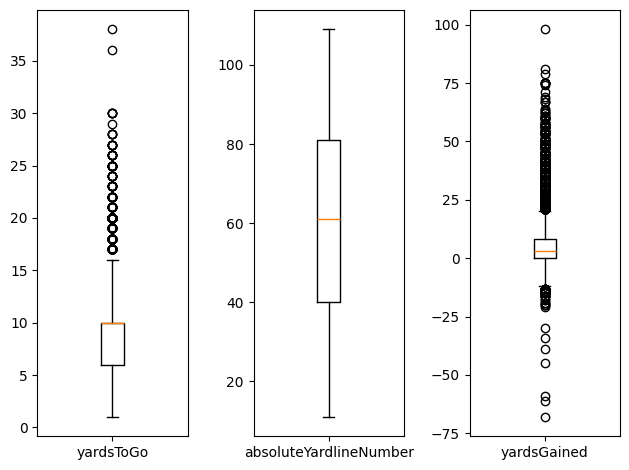

In [33]:
fig, ax = plt.subplots(1, 3)

ax[0].boxplot(df['yardsToGo'], tick_labels=['yardsToGo'])

ax[1].boxplot(df['absoluteYardlineNumber'], tick_labels=['absoluteYardlineNumber'])

ax[2].boxplot(df['yardsGained'], tick_labels=['yardsGained'])

plt.tight_layout()
plt.show()

We may need to normalize these fields but I will not do it here since normalization should happen after the train and test split, which will not happen in this notebook.

The absolute yardline number column goes from [11, 109]. This makes me think that the back of 1 endzone is encoded as 0. Since the NFL endzones are 10 yards wide, by subtracting 10 from each value I will get values within the playing space ~[0, 99].

In [34]:
df.loc[:, 'absoluteYardlineNumber'] = df.absoluteYardlineNumber - 10
df.absoluteYardlineNumber.describe()

count    15911.000000
mean        50.429137
std         24.317967
min          1.000000
25%         30.000000
50%         51.000000
75%         71.000000
max         99.000000
Name: absoluteYardlineNumber, dtype: float64

### Encode Categorical Variables

In [35]:
df.select_dtypes(include=[object]).columns

Index(['playDescription', 'gameClock', 'offenseFormation', 'receiverAlignment',
       'dropbackType', 'rushLocationType', 'pff_runConceptPrimary',
       'pff_passCoverage', 'pff_manZone'],
      dtype='object')

#### Game Clock
For game clock, we want game clock to be a numeric value instead of a string. So the game clock will be replaced with a new column to show how many seconds are left in the given quarter, called `secondsRemainingInQuarter`.

In [36]:
df.gameClock

0        01:54
1        02:13
2        02:00
3        09:28
4        02:16
         ...  
16119    12:49
16120    12:32
16121    09:59
16122    00:45
16123    15:00
Name: gameClock, Length: 15911, dtype: object

In [37]:
split_game_clock = df.gameClock.str.split(':', expand=True)
df['secondsRemainingInQuarter']= (split_game_clock[0].astype(int) * 60) + split_game_clock[1].astype(int)
df = df.drop('gameClock', axis=1)
df.secondsRemainingInQuarter.describe()

count    15911.000000
mean       434.687889
std        270.199287
min          1.000000
25%        190.000000
50%        426.000000
75%        669.000000
max        900.000000
Name: secondsRemainingInQuarter, dtype: float64

#### Offensive Formation

In [38]:
offensive_formation_encoding = pd.get_dummies(df.offenseFormation, prefix='offFormation_', dtype=int)
offensive_formation_encoding

,offFormation__EMPTY,offFormation__I_FORM,offFormation__JUMBO,offFormation__PISTOL,offFormation__SHOTGUN,offFormation__SINGLEBACK,offFormation__WILDCAT
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
16119,0,0,0,0,1,0,0
16120,0,0,0,0,1,0,0
16121,0,0,0,0,1,0,0
16122,0,0,0,0,0,1,0


In [39]:
df = df.drop('offenseFormation', axis=1)
df = df.join(offensive_formation_encoding)
df

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,quarter,receiverAlignment,playAction,dropbackType,qbSneak,...,pff_manZone,yardsGained,secondsRemainingInQuarter,offFormation__EMPTY,offFormation__I_FORM,offFormation__JUMBO,offFormation__PISTOL,offFormation__SHOTGUN,offFormation__SINGLEBACK,offFormation__WILDCAT
0,(1:54) (Shotgun) J.Burrow pass short middle to...,True,1,10,21,3,3x2,False,TRADITIONAL,0,...,Zone,9,114,1,0,0,0,0,0,0
1,(2:13) (Shotgun) J.Burrow pass short right to ...,True,1,10,8,4,3x2,False,TRADITIONAL,0,...,Zone,4,133,1,0,0,0,0,0,0
2,(2:00) (Shotgun) D.Mills pass short right to D...,True,3,12,20,4,2x2,False,TRADITIONAL,0,...,Zone,6,120,0,0,0,0,1,0,0
3,(9:28) (Shotgun) P.Mahomes pass short left to ...,True,2,10,23,1,2x2,False,TRADITIONAL,0,...,Zone,4,568,0,0,0,0,1,0,0
4,(2:16) (Shotgun) L.Jackson up the middle to TB...,False,2,8,27,3,3x1,True,DESIGNED_RUN,0,...,Man,-1,136,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,(12:49) (Shotgun) T.Lawrence pass incomplete s...,True,3,4,69,2,2x2,False,TRADITIONAL,0,...,Zone,0,769,0,0,0,0,1,0,0
16120,(12:32) (Shotgun) K.Cousins pass incomplete de...,True,1,10,25,4,2x2,False,TRADITIONAL,0,...,Zone,0,752,0,0,0,0,1,0,0
16121,(9:59) (Shotgun) P.Mahomes scrambles right end...,True,1,10,87,3,2x2,False,SCRAMBLE,0,...,Zone,10,599,0,0,0,0,1,0,0
16122,(:45) C.Rush pass incomplete deep right to C.L...,True,1,10,47,1,2x2,True,TRADITIONAL,0,...,Zone,0,45,0,0,0,0,0,1,0


#### Receiver Alignment
Since receiver alignment is like 3x2, 1x2, 2x2, etc. we will seperate it on the 'x' into 2 columns, `leftRecievers` and `rightReceivers`.

In [40]:
df[['leftReceivers', 'rightReceivers']] = df.receiverAlignment.str.split('x', expand=True).astype(int)
df[['receiverAlignment', 'leftReceivers', 'rightReceivers']]

,receiverAlignment,leftReceivers,rightReceivers
0,3x2,3,2
1,3x2,3,2
2,2x2,2,2
3,2x2,2,2
4,3x1,3,1
...,...,...,...
16119,2x2,2,2
16120,2x2,2,2
16121,2x2,2,2
16122,2x2,2,2


In [41]:
df = df.drop('receiverAlignment', axis=1)

#### Play Action
Play action is already a boolean but I will cast to int to get 0 and 1 instead of true and false so the model only has to work with numeric values.

In [42]:
df.playAction = df.playAction.astype(int)
df.playAction

0        0
1        0
2        0
3        0
4        1
        ..
16119    0
16120    0
16121    0
16122    1
16123    0
Name: playAction, Length: 15911, dtype: int64

#### Dropback Type

For the rest of the categorical columns I will use pandas `get_dummies` to encode the unique column values and cast them as columns of ints. I will then drop the old categorical column and join the new int columns to the dataframe.

In [43]:
dropback_type_encoding = pd.get_dummies(df.dropbackType, prefix='dropbackType_', dtype=int)
dropback_type_encoding

,dropbackType__DESIGNED_ROLLOUT_LEFT,dropbackType__DESIGNED_ROLLOUT_RIGHT,dropbackType__DESIGNED_RUN,dropbackType__QB_SNEAK,dropbackType__SCRAMBLE,dropbackType__SCRAMBLE_ROLLOUT_LEFT,dropbackType__SCRAMBLE_ROLLOUT_RIGHT,dropbackType__TRADITIONAL,dropbackType__UNKNOWN
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
16119,0,0,0,0,0,0,0,1,0
16120,0,0,0,0,0,0,0,1,0
16121,0,0,0,0,1,0,0,0,0
16122,0,0,0,0,0,0,0,1,0


In [44]:
df = df.drop('dropbackType', axis=1)
df = df.join(dropback_type_encoding)
df

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,quarter,playAction,qbSneak,rushLocationType,pff_runConceptPrimary,...,rightReceivers,dropbackType__DESIGNED_ROLLOUT_LEFT,dropbackType__DESIGNED_ROLLOUT_RIGHT,dropbackType__DESIGNED_RUN,dropbackType__QB_SNEAK,dropbackType__SCRAMBLE,dropbackType__SCRAMBLE_ROLLOUT_LEFT,dropbackType__SCRAMBLE_ROLLOUT_RIGHT,dropbackType__TRADITIONAL,dropbackType__UNKNOWN
0,(1:54) (Shotgun) J.Burrow pass short middle to...,True,1,10,21,3,0,0,NONE,NONE,...,2,0,0,0,0,0,0,0,1,0
1,(2:13) (Shotgun) J.Burrow pass short right to ...,True,1,10,8,4,0,0,NONE,NONE,...,2,0,0,0,0,0,0,0,1,0
2,(2:00) (Shotgun) D.Mills pass short right to D...,True,3,12,20,4,0,0,NONE,NONE,...,2,0,0,0,0,0,0,0,1,0
3,(9:28) (Shotgun) P.Mahomes pass short left to ...,True,2,10,23,1,0,0,NONE,NONE,...,2,0,0,0,0,0,0,0,1,0
4,(2:16) (Shotgun) L.Jackson up the middle to TB...,False,2,8,27,3,1,0,INSIDE_LEFT,MAN,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,(12:49) (Shotgun) T.Lawrence pass incomplete s...,True,3,4,69,2,0,0,NONE,NONE,...,2,0,0,0,0,0,0,0,1,0
16120,(12:32) (Shotgun) K.Cousins pass incomplete de...,True,1,10,25,4,0,0,NONE,NONE,...,2,0,0,0,0,0,0,0,1,0
16121,(9:59) (Shotgun) P.Mahomes scrambles right end...,True,1,10,87,3,0,0,INSIDE_RIGHT,NONE,...,2,0,0,0,0,1,0,0,0,0
16122,(:45) C.Rush pass incomplete deep right to C.L...,True,1,10,47,1,1,0,NONE,NONE,...,2,0,0,0,0,0,0,0,1,0


#### Rush Location Type

In [45]:
df.rushLocationType.unique()

array(['NONE', 'INSIDE_LEFT', 'INSIDE_RIGHT', 'OUTSIDE_LEFT',
       'OUTSIDE_RIGHT'], dtype=object)

In [46]:
rush_location_encoding = pd.get_dummies(df.rushLocationType, prefix='rushLocation_', dtype=int)
rush_location_encoding

,rushLocation__INSIDE_LEFT,rushLocation__INSIDE_RIGHT,rushLocation__NONE,rushLocation__OUTSIDE_LEFT,rushLocation__OUTSIDE_RIGHT
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
16119,0,0,1,0,0
16120,0,0,1,0,0
16121,0,1,0,0,0
16122,0,0,1,0,0


In [47]:
df = df.drop('rushLocationType', axis=1)
df = df.join(rush_location_encoding)
df

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,quarter,playAction,qbSneak,pff_runConceptPrimary,pff_runPassOption,...,dropbackType__SCRAMBLE,dropbackType__SCRAMBLE_ROLLOUT_LEFT,dropbackType__SCRAMBLE_ROLLOUT_RIGHT,dropbackType__TRADITIONAL,dropbackType__UNKNOWN,rushLocation__INSIDE_LEFT,rushLocation__INSIDE_RIGHT,rushLocation__NONE,rushLocation__OUTSIDE_LEFT,rushLocation__OUTSIDE_RIGHT
0,(1:54) (Shotgun) J.Burrow pass short middle to...,True,1,10,21,3,0,0,NONE,0,...,0,0,0,1,0,0,0,1,0,0
1,(2:13) (Shotgun) J.Burrow pass short right to ...,True,1,10,8,4,0,0,NONE,0,...,0,0,0,1,0,0,0,1,0,0
2,(2:00) (Shotgun) D.Mills pass short right to D...,True,3,12,20,4,0,0,NONE,0,...,0,0,0,1,0,0,0,1,0,0
3,(9:28) (Shotgun) P.Mahomes pass short left to ...,True,2,10,23,1,0,0,NONE,0,...,0,0,0,1,0,0,0,1,0,0
4,(2:16) (Shotgun) L.Jackson up the middle to TB...,False,2,8,27,3,1,0,MAN,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,(12:49) (Shotgun) T.Lawrence pass incomplete s...,True,3,4,69,2,0,0,NONE,0,...,0,0,0,1,0,0,0,1,0,0
16120,(12:32) (Shotgun) K.Cousins pass incomplete de...,True,1,10,25,4,0,0,NONE,0,...,0,0,0,1,0,0,0,1,0,0
16121,(9:59) (Shotgun) P.Mahomes scrambles right end...,True,1,10,87,3,0,0,NONE,0,...,1,0,0,0,0,0,1,0,0,0
16122,(:45) C.Rush pass incomplete deep right to C.L...,True,1,10,47,1,1,0,NONE,0,...,0,0,0,1,0,0,0,1,0,0


In [48]:
df.select_dtypes(include=[object]).columns

Index(['playDescription', 'pff_runConceptPrimary', 'pff_passCoverage',
       'pff_manZone'],
      dtype='object')

#### Primary Run Concept

In [49]:
df.pff_runConceptPrimary.unique()

array(['NONE', 'MAN', 'INSIDE ZONE', 'PULL LEAD', 'OUTSIDE ZONE', 'TRAP',
       'SNEAK', 'POWER', 'COUNTER', 'DRAW', 'OTHER', 'TRICK', 'FB RUN'],
      dtype=object)

In [50]:
run_concept_encoding = pd.get_dummies(df.pff_runConceptPrimary, prefix='rushConcept_', dtype=int)
run_concept_encoding

,rushConcept__COUNTER,rushConcept__DRAW,rushConcept__FB RUN,rushConcept__INSIDE ZONE,rushConcept__MAN,rushConcept__NONE,rushConcept__OTHER,rushConcept__OUTSIDE ZONE,rushConcept__POWER,rushConcept__PULL LEAD,rushConcept__SNEAK,rushConcept__TRAP,rushConcept__TRICK
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,0,0,0,0,0,1,0,0,0,0,0,0,0
16120,0,0,0,0,0,1,0,0,0,0,0,0,0
16121,0,0,0,0,0,1,0,0,0,0,0,0,0
16122,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
df = df.drop('pff_runConceptPrimary', axis=1)
df = df.join(run_concept_encoding)
df

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,quarter,playAction,qbSneak,pff_runPassOption,pff_passCoverage,...,rushConcept__INSIDE ZONE,rushConcept__MAN,rushConcept__NONE,rushConcept__OTHER,rushConcept__OUTSIDE ZONE,rushConcept__POWER,rushConcept__PULL LEAD,rushConcept__SNEAK,rushConcept__TRAP,rushConcept__TRICK
0,(1:54) (Shotgun) J.Burrow pass short middle to...,True,1,10,21,3,0,0,0,Cover-3,...,0,0,1,0,0,0,0,0,0,0
1,(2:13) (Shotgun) J.Burrow pass short right to ...,True,1,10,8,4,0,0,0,Quarters,...,0,0,1,0,0,0,0,0,0,0
2,(2:00) (Shotgun) D.Mills pass short right to D...,True,3,12,20,4,0,0,0,Quarters,...,0,0,1,0,0,0,0,0,0,0
3,(9:28) (Shotgun) P.Mahomes pass short left to ...,True,2,10,23,1,0,0,0,Quarters,...,0,0,1,0,0,0,0,0,0,0
4,(2:16) (Shotgun) L.Jackson up the middle to TB...,False,2,8,27,3,1,0,0,Cover-1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,(12:49) (Shotgun) T.Lawrence pass incomplete s...,True,3,4,69,2,0,0,0,Cover-2,...,0,0,1,0,0,0,0,0,0,0
16120,(12:32) (Shotgun) K.Cousins pass incomplete de...,True,1,10,25,4,0,0,0,Cover-3,...,0,0,1,0,0,0,0,0,0,0
16121,(9:59) (Shotgun) P.Mahomes scrambles right end...,True,1,10,87,3,0,0,0,Quarters,...,0,0,1,0,0,0,0,0,0,0
16122,(:45) C.Rush pass incomplete deep right to C.L...,True,1,10,47,1,1,0,0,Cover-3,...,0,0,1,0,0,0,0,0,0,0


#### Pass Coverage

In [52]:
df.pff_passCoverage.unique()

array(['Cover-3', 'Quarters', 'Cover-1', 'Cover 6-Left', 'Cover-2',
       'Cover-0', 'Cover-3 Seam', 'Cover-6 Right', 'Goal Line',
       'Red Zone', '2-Man', 'Cover-3 Double Cloud', 'Bracket',
       'Miscellaneous', 'Cover-3 Cloud Left', 'Prevent', 'Cover-1 Double',
       'Cover-3 Cloud Right'], dtype=object)

In [53]:
pass_coverage_encoding = pd.get_dummies(df.pff_passCoverage, prefix='passCoverage_', dtype=int)
pass_coverage_encoding

,passCoverage__2-Man,passCoverage__Bracket,passCoverage__Cover 6-Left,passCoverage__Cover-0,passCoverage__Cover-1,passCoverage__Cover-1 Double,passCoverage__Cover-2,passCoverage__Cover-3,passCoverage__Cover-3 Cloud Left,passCoverage__Cover-3 Cloud Right,passCoverage__Cover-3 Double Cloud,passCoverage__Cover-3 Seam,passCoverage__Cover-6 Right,passCoverage__Goal Line,passCoverage__Miscellaneous,passCoverage__Prevent,passCoverage__Quarters,passCoverage__Red Zone
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16120,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16122,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
df = df.drop('pff_passCoverage', axis=1)
df = df.join(pass_coverage_encoding)
df

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,quarter,playAction,qbSneak,pff_runPassOption,pff_manZone,...,passCoverage__Cover-3 Cloud Left,passCoverage__Cover-3 Cloud Right,passCoverage__Cover-3 Double Cloud,passCoverage__Cover-3 Seam,passCoverage__Cover-6 Right,passCoverage__Goal Line,passCoverage__Miscellaneous,passCoverage__Prevent,passCoverage__Quarters,passCoverage__Red Zone
0,(1:54) (Shotgun) J.Burrow pass short middle to...,True,1,10,21,3,0,0,0,Zone,...,0,0,0,0,0,0,0,0,0,0
1,(2:13) (Shotgun) J.Burrow pass short right to ...,True,1,10,8,4,0,0,0,Zone,...,0,0,0,0,0,0,0,0,1,0
2,(2:00) (Shotgun) D.Mills pass short right to D...,True,3,12,20,4,0,0,0,Zone,...,0,0,0,0,0,0,0,0,1,0
3,(9:28) (Shotgun) P.Mahomes pass short left to ...,True,2,10,23,1,0,0,0,Zone,...,0,0,0,0,0,0,0,0,1,0
4,(2:16) (Shotgun) L.Jackson up the middle to TB...,False,2,8,27,3,1,0,0,Man,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,(12:49) (Shotgun) T.Lawrence pass incomplete s...,True,3,4,69,2,0,0,0,Zone,...,0,0,0,0,0,0,0,0,0,0
16120,(12:32) (Shotgun) K.Cousins pass incomplete de...,True,1,10,25,4,0,0,0,Zone,...,0,0,0,0,0,0,0,0,0,0
16121,(9:59) (Shotgun) P.Mahomes scrambles right end...,True,1,10,87,3,0,0,0,Zone,...,0,0,0,0,0,0,0,0,1,0
16122,(:45) C.Rush pass incomplete deep right to C.L...,True,1,10,47,1,1,0,0,Zone,...,0,0,0,0,0,0,0,0,0,0


#### Man Zone

In [55]:
df.pff_manZone.unique()

array(['Zone', 'Man', 'Other'], dtype=object)

In [56]:
man_zone_encoding = pd.get_dummies(df.pff_manZone, prefix='manZone_', dtype=int)
man_zone_encoding

,manZone__Man,manZone__Other,manZone__Zone
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
16119,0,0,1
16120,0,0,1
16121,0,0,1
16122,0,0,1


In [57]:
df = df.drop('pff_manZone', axis=1)
df = df.join(man_zone_encoding)
df

,playDescription,isDropback,down,yardsToGo,absoluteYardlineNumber,quarter,playAction,qbSneak,pff_runPassOption,yardsGained,...,passCoverage__Cover-3 Seam,passCoverage__Cover-6 Right,passCoverage__Goal Line,passCoverage__Miscellaneous,passCoverage__Prevent,passCoverage__Quarters,passCoverage__Red Zone,manZone__Man,manZone__Other,manZone__Zone
0,(1:54) (Shotgun) J.Burrow pass short middle to...,True,1,10,21,3,0,0,0,9,...,0,0,0,0,0,0,0,0,0,1
1,(2:13) (Shotgun) J.Burrow pass short right to ...,True,1,10,8,4,0,0,0,4,...,0,0,0,0,0,1,0,0,0,1
2,(2:00) (Shotgun) D.Mills pass short right to D...,True,3,12,20,4,0,0,0,6,...,0,0,0,0,0,1,0,0,0,1
3,(9:28) (Shotgun) P.Mahomes pass short left to ...,True,2,10,23,1,0,0,0,4,...,0,0,0,0,0,1,0,0,0,1
4,(2:16) (Shotgun) L.Jackson up the middle to TB...,False,2,8,27,3,1,0,0,-1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,(12:49) (Shotgun) T.Lawrence pass incomplete s...,True,3,4,69,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16120,(12:32) (Shotgun) K.Cousins pass incomplete de...,True,1,10,25,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16121,(9:59) (Shotgun) P.Mahomes scrambles right end...,True,1,10,87,3,0,0,0,10,...,0,0,0,0,0,1,0,0,0,1
16122,(:45) C.Rush pass incomplete deep right to C.L...,True,1,10,47,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df.select_dtypes(include=[object]).columns

Index(['playDescription'], dtype='object')

In [59]:
# These columns were only used for additional context during the pre processing steps, will not use in model
df = df.drop(columns=['playDescription', 'isDropback'])
df

,down,yardsToGo,absoluteYardlineNumber,quarter,playAction,qbSneak,pff_runPassOption,yardsGained,secondsRemainingInQuarter,offFormation__EMPTY,...,passCoverage__Cover-3 Seam,passCoverage__Cover-6 Right,passCoverage__Goal Line,passCoverage__Miscellaneous,passCoverage__Prevent,passCoverage__Quarters,passCoverage__Red Zone,manZone__Man,manZone__Other,manZone__Zone
0,1,10,21,3,0,0,0,9,114,1,...,0,0,0,0,0,0,0,0,0,1
1,1,10,8,4,0,0,0,4,133,1,...,0,0,0,0,0,1,0,0,0,1
2,3,12,20,4,0,0,0,6,120,0,...,0,0,0,0,0,1,0,0,0,1
3,2,10,23,1,0,0,0,4,568,0,...,0,0,0,0,0,1,0,0,0,1
4,2,8,27,3,1,0,0,-1,136,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,3,4,69,2,0,0,0,0,769,0,...,0,0,0,0,0,0,0,0,0,1
16120,1,10,25,4,0,0,0,0,752,0,...,0,0,0,0,0,0,0,0,0,1
16121,1,10,87,3,0,0,0,10,599,0,...,0,0,0,0,0,1,0,0,0,1
16122,1,10,47,1,1,0,0,0,45,0,...,0,0,0,0,0,0,0,0,0,1


### Manage Column Names

In [60]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.replace("__", "_")
df.columns

Index(['down', 'yardsToGo', 'absoluteYardlineNumber', 'quarter', 'playAction',
       'qbSneak', 'pff_runPassOption', 'yardsGained',
       'secondsRemainingInQuarter', 'offFormation_EMPTY',
       'offFormation_I_FORM', 'offFormation_JUMBO', 'offFormation_PISTOL',
       'offFormation_SHOTGUN', 'offFormation_SINGLEBACK',
       'offFormation_WILDCAT', 'leftReceivers', 'rightReceivers',
       'dropbackType_DESIGNED_ROLLOUT_LEFT',
       'dropbackType_DESIGNED_ROLLOUT_RIGHT', 'dropbackType_DESIGNED_RUN',
       'dropbackType_QB_SNEAK', 'dropbackType_SCRAMBLE',
       'dropbackType_SCRAMBLE_ROLLOUT_LEFT',
       'dropbackType_SCRAMBLE_ROLLOUT_RIGHT', 'dropbackType_TRADITIONAL',
       'dropbackType_UNKNOWN', 'rushLocation_INSIDE_LEFT',
       'rushLocation_INSIDE_RIGHT', 'rushLocation_NONE',
       'rushLocation_OUTSIDE_LEFT', 'rushLocation_OUTSIDE_RIGHT',
       'rushConcept_COUNTER', 'rushConcept_DRAW', 'rushConcept_FB_RUN',
       'rushConcept_INSIDE_ZONE', 'rushConcept_MAN', 'rushCo

### Output Processed Dataset

In [61]:
final_df_shape = df.shape
print(f'The final, processed dataset has and {final_df_shape[0]} rows and {final_df_shape[1]} columns.')

The final, processed dataset has and 15911 rows and 66 columns.


In [62]:
df.to_csv('../data/processed/processed_plays.csv', index=False)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15911 entries, 0 to 16123
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   down                                 15911 non-null  int64
 1   yardsToGo                            15911 non-null  int64
 2   absoluteYardlineNumber               15911 non-null  int64
 3   quarter                              15911 non-null  int64
 4   playAction                           15911 non-null  int64
 5   qbSneak                              15911 non-null  int64
 6   pff_runPassOption                    15911 non-null  int64
 7   yardsGained                          15911 non-null  int64
 8   secondsRemainingInQuarter            15911 non-null  int64
 9   offFormation_EMPTY                   15911 non-null  int64
 10  offFormation_I_FORM                  15911 non-null  int64
 11  offFormation_JUMBO                   15911 non-null  int64
